In [1]:
import pandas as pd

# Import the data

In [2]:
formaal_df = pd.read_csv('../data/formaal.csv', delimiter='\t', error_bad_lines=False)
formaal_df.head()

,orgnr,formaal
0,810896752,Skogbruk.
1,811014982,Religiøse organisasjoner
2,811544922,Trenings- og svømmeinstruktør.
3,811545422,Transport av varer på vei og budtjenester.
4,811545902,Fluefiskeguide. Arrangering av guidet fisketur...


In [3]:
nace_codes_df = pd.read_csv('../data/nacekoder.tab', delimiter="\t", usecols=['orgnr', 'nacekode'])
nace_codes_df.head()

,orgnr,nacekode
0,810896752,47.112
1,811014982,94.910
2,811544922,85.599
3,811545082,90.020
4,811545112,46.739


## Merge the two datasets

In [4]:
data_df = pd.merge(formaal_df, nace_codes_df, on='orgnr', how='inner')
len(data_df)

558588

In [5]:
len(nace_codes_df.orgnr.unique())

1202884

In [6]:
len(formaal_df.orgnr.unique())

581094

In [7]:
len(data_df.orgnr.unique())

545364

In [8]:
data_df.head()

,orgnr,formaal,nacekode
0,810896752,Skogbruk.,47.112
1,811014982,Religiøse organisasjoner,94.910
2,811544922,Trenings- og svømmeinstruktør.,85.599
3,811545422,Transport av varer på vei og budtjenester.,49.410
4,811545902,Fluefiskeguide. Arrangering av guidet fisketur...,93.299


# Investigate distribution of classes

In [9]:
len(data_df.nacekode.unique())

781

<Figure size 720x432 with 0 Axes>

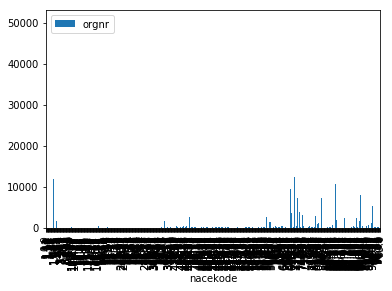

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10,6))
df = data_df[['nacekode', 'orgnr']]
df.groupby('nacekode').count().plot.bar(ylim=0)
plt.show()